# 1.分别用关键词“电竞”和“电子竞技”爬取新浪新闻财经频道

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [40]:
#爬取关键字为“电竞”，范围为新浪新闻财经频道1到88页，约为2018年到2006年
base_url='http://search.sina.com.cn/?c=news&q=%B5%E7%BE%BA&range=title&num=10&col=1_7&source=&from=&country=&size=&time=&a=&page={}&pf=2131425496&ps=2132080888&dpc=1'

all_datetime = []
all_source = []
sourcelist=[]
datelist=[]
yearlist = []
monthlist = []
daylist = []
titlelist=[]
all_link= []


for page in range(0, 89):
    url = base_url.format(page)
    req = requests.get(url,headers={'Accept-Encoding': ''})
    #req.encoding = 'UTF-8'
    soup = BeautifulSoup(req.text, 'html.parser')
    div_name = soup.find_all('h2')
    title=[i.find('a') for i in div_name]
   #links = soup.find_all('div',class_='r-info r-info2')
    #for item in links:
    #    link = item.find('a').attrs['href']
     #   all_link.append(link)
    for a in title:
        titlelist.append(a.get_text())
        
    div_date_source = soup.find_all('span', class_='fgray_time')
    date_source = [a.get_text() for a in div_date_source]
  
    for i in date_source:
        sourcelist.append(i.split(" ",2)[0])
        datelist.append(i.split(' ',2)[1])
        #print(datelist)
        t=i.split(' ',2)[1]
        yearlist.append(t.split("-",2)[0])
        monthlist.append(t.split("-",2)[1])
        daylist.append(t.split("-",2)[2])
     


df = pd.DataFrame({'title':titlelist,
                    'source':sourcelist,
                   'year':yearlist,
                 'month':monthlist,
                  'day':daylist})

df

df.to_csv("sinanews_dianjing1.csv")

In [26]:
df_dianjing1 = pd.read_csv('sinanews_dianjing1.csv')
df_dianjing1.head()

,Unnamed: 0,title,source,year,month,day
0,0,QG电竞俱乐部完成近亿元A轮融资,新浪财经,2018,9,27
1,1,亚运会夺冠会给电竞教育带来多少利好,新浪财经-自媒体综合,2018,9,13
2,2,【Research and Markets：电竞市场在2,新浪财经,2018,9,11
3,3,多路资本涌入880亿电竞市场 中国电竞等待斯特恩,每日经济新闻,2018,9,11
4,4,虎牙宣布运营《守望先锋联赛》战队 布局全球电竞,环球网,2018,9,8


In [3]:
#爬取关键词为“电子竞技”,爬取范围为新浪新闻财经领域第1至89页
base_url='http://search.sina.com.cn/?q=%B5%E7%D7%D3%BE%BA%BC%BC&range=title&c=news&sort=time&col=&source=&from=&country=&size=&time=&a=&page={}&pf=2131425462&ps=2134309112&dpc=1'

all_datetime = []
all_source = []
sourcelist=[]
datelist=[]
yearlist = []
monthlist = []
daylist = []
titlelist=[]
all_link= []

for page in range(0, 89):
    url = base_url.format(page)
    req = requests.get(url,headers={'Accept-Encoding': ''})
    #req.encoding = 'UTF-8'
    soup = BeautifulSoup(req.text, 'html.parser')
    div_name = soup.find_all('h2')
    title=[i.find('a') for i in div_name]
   #links = soup.find_all('div',class_='r-info r-info2')
    #for item in links:
    #    link = item.find('a').attrs['href']
     #   all_link.append(link)
    for a in title:
        titlelist.append(a.get_text())
        
    div_date_source = soup.find_all('span', class_='fgray_time')
    date_source = [a.get_text() for a in div_date_source]
  
    for i in date_source:
        sourcelist.append(i.split(" ",2)[0])
        datelist.append(i.split(' ',2)[1])
        #print(datelist)
        t=i.split(' ',2)[1]
        yearlist.append(t.split("-",2)[0])
        monthlist.append(t.split("-",2)[1])
        daylist.append(t.split("-",2)[2])
     


df = pd.DataFrame({'title':titlelist,
                    'source':sourcelist,
                   'year':yearlist,
                 'month':monthlist,
                  'day':daylist})

df

df.to_csv("sinanews_dianjing2.csv")

In [27]:
df_dianjing2 = pd.read_csv('sinanews_dianjing2.csv')
df_dianjing2.head()

,Unnamed: 0,Unnamed: 0.1,title,source,year,month,day
0,0,0,2018 NESO北京赛区电子竞技选拔赛开启,新浪体育,2018,11,14
1,1,1,我儿子2007年出生，他现在的愿望是考入清华大学电子竞技系,新浪育儿,2018,11,10
2,2,2,调查显示一部更大的手机可以帮助你赢得电子竞技锦标赛,cnbeta,2018,10,12
3,3,3,演绎传统体育与电子竞技的《傲慢与偏见》——RNG跑团,新浪体育,2018,9,29
4,4,4,新华社电子竞技调研之三：电竞=电子游戏吗？,新华社,2018,9,27


# 2.将爬取的新闻合并（电竞和电子竞技），清洗数据

In [29]:
df_dianjing1 = pd.read_csv('sinanews_dianjing1.csv')
df_dianjing2 = pd.read_csv('sinanews_dianjing2.csv')

In [34]:
frames = [df_dianjing1, df_dianjing2]

result = pd.concat(frames)

sort=False

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
result.head()
result.to_csv("hebing1.csv")

In [36]:
df_dianjing5 = result
df_dianjing5

,Unnamed: 0,Unnamed: 0.1,day,month,source,title,year
0,0,NaN,27,9,新浪财经,QG电竞俱乐部完成近亿元A轮融资,2018
1,1,NaN,13,9,新浪财经-自媒体综合,亚运会夺冠会给电竞教育带来多少利好,2018
2,2,NaN,11,9,新浪财经,【Research and Markets：电竞市场在2,2018
3,3,NaN,11,9,每日经济新闻,多路资本涌入880亿电竞市场 中国电竞等待斯特恩,2018
4,4,NaN,8,9,环球网,虎牙宣布运营《守望先锋联赛》战队 布局全球电竞,2018
5,5,NaN,7,9,娱乐资本论,电竞馆的贴地飞行：从两月回本 到办卡跑路,2018
6,6,NaN,4,9,新浪财经-自媒体综合,奥委会主席表态 电竞产业布局生变,2018
7,7,NaN,3,9,北京商报,奥委会主席表态 电竞产业将迎调整风口,2018
8,8,NaN,3,9,乐居财经,9家房企争夺！中国电建9.8亿竞得大杨石65.51亩居住用地,2018
9,9,NaN,3,9,新京报,巴赫：电竞不移除暴力元素就不允许入奥,2018


In [37]:
df_dianjing5['title'].is_unique

False

In [38]:
df_dianjing6 = pd
df_dianjing6 = df_dianjing5.drop_duplicates('title')

In [39]:
df_dianjing6['title'].is_unique

True

In [40]:
df_dianjing6

,Unnamed: 0,Unnamed: 0.1,day,month,source,title,year
0,0,NaN,27,9,新浪财经,QG电竞俱乐部完成近亿元A轮融资,2018
1,1,NaN,13,9,新浪财经-自媒体综合,亚运会夺冠会给电竞教育带来多少利好,2018
2,2,NaN,11,9,新浪财经,【Research and Markets：电竞市场在2,2018
3,3,NaN,11,9,每日经济新闻,多路资本涌入880亿电竞市场 中国电竞等待斯特恩,2018
4,4,NaN,8,9,环球网,虎牙宣布运营《守望先锋联赛》战队 布局全球电竞,2018
5,5,NaN,7,9,娱乐资本论,电竞馆的贴地飞行：从两月回本 到办卡跑路,2018
6,6,NaN,4,9,新浪财经-自媒体综合,奥委会主席表态 电竞产业布局生变,2018
7,7,NaN,3,9,北京商报,奥委会主席表态 电竞产业将迎调整风口,2018
8,8,NaN,3,9,乐居财经,9家房企争夺！中国电建9.8亿竞得大杨石65.51亩居住用地,2018
9,9,NaN,3,9,新京报,巴赫：电竞不移除暴力元素就不允许入奥,2018


In [41]:
df_dianjing6.sort_values(by = "year",ascending = False)

,Unnamed: 0,Unnamed: 0.1,day,month,source,title,year
0,0,NaN,27,9,新浪财经,QG电竞俱乐部完成近亿元A轮融资,2018
53,53,53.0,18,6,扬子晚报网,CEC2018苏州激情开幕！中国电子竞技嘉年华总部基地落户苏州,2018
77,77,77.0,19,3,中国新闻网,第二届世界电子竞技运动会全球总决赛闭幕 中国女子CS：GO获亚军,2018
76,76,76.0,20,3,新华社,电子竞技奥运路还有多长 最大限度规避游戏副作用,2018
75,75,75.0,28,3,中国青年报,霍启刚：电子竞技可登亚运奥运大雅之堂,2018
74,74,74.0,2,4,中国体育报,电子竞技将亮相京交会,2018
73,73,73.0,12,4,人民日报海外版海外网,我能用国足参加国际足联的电子竞技世界杯吗？,2018
72,72,72.0,29,4,新浪财经,2018中国一东盟电子竞技大赛在南宁启动,2018
71,71,71.0,29,4,中国新闻网,中国一东盟电子竞技大赛9月举行 赛事覆盖东盟十国,2018
70,70,70.0,7,5,新浪体育,2018年UCL中国大学生电子竞技联赛圆满落幕,2018


In [102]:
df_dianjing6.to_csv("hebing.csv")

# 4.作图

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df6 =pd.read_csv('hebing.csv')

In [46]:
df5 = pd
df5 = df6.loc[df6['year']> 2008]
df5

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,title,source,year,month,day
0,0,0,0,2018 NESO北京赛区电子竞技选拔赛开启,新浪体育,2018,11,14
1,1,1,1,我儿子2007年出生，他现在的愿望是考入清华大学电子竞技系,新浪育儿,2018,11,10
2,2,2,2,调查显示一部更大的手机可以帮助你赢得电子竞技锦标赛,cnbeta,2018,10,12
3,3,3,3,演绎传统体育与电子竞技的《傲慢与偏见》——RNG跑团,新浪体育,2018,9,29
4,4,4,4,新华社电子竞技调研之三：电竞=电子游戏吗？,新华社,2018,9,27
5,5,5,5,新华社电子竞技调研之二：“巨大吸引力”与“上瘾”,新华社,2018,9,27
6,6,6,6,电子竞技入亚分歧远未停止 未成年人谁来保障？,新华社,2018,9,27
7,7,7,7,2018省高校电子竞技联赛10月将决战南京,扬子晚报网,2018,9,19
8,8,8,8,快讯：电子竞技板块异动拉升 天神娱乐逼近涨停,新浪财经,2018,9,12
9,9,9,9,亚运中国十大亮点：农民成为冠军 电子竞技引热潮,体育综合,2018,9,5


In [7]:
df5.to_csv("sinanews0918.csv")

In [47]:
dict_year = {}
for key in df5['year']:
    dict_year[key] = dict_year.get(key, 0) + 1
print(dict_year)

{2018: 198, 2017: 377, 2016: 241, 2015: 155, 2014: 157, 2013: 89, 2012: 53, 2011: 42, 2010: 86, 2009: 48}


In [48]:
def sortedDictValues1(dict_year): 
    items = adict.items() 
    items.sort() 
    return [value for key, value in items] 
print(dict_year)

{2018: 198, 2017: 377, 2016: 241, 2015: 155, 2014: 157, 2013: 89, 2012: 53, 2011: 42, 2010: 86, 2009: 48}


In [49]:
#print(sorted(dict_year.items(), key = lambda d:d[0]))
new_list = []
new_list = sorted(dict_year.items(), key = lambda d:d[0])

In [50]:
new_dict = {}
for i in new_list:
    new_dict[i[0]] = i[1]                
new_dict

{2009: 48,
 2010: 86,
 2011: 42,
 2012: 53,
 2013: 89,
 2014: 157,
 2015: 155,
 2016: 241,
 2017: 377,
 2018: 198}

In [51]:
x1 = []
for i in new_dict.keys():
        x1.append(i)

print(x1)

y1 = []
for i in new_dict.values():
    y1.append(i)
print(y1)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[48, 86, 42, 53, 89, 157, 155, 241, 377, 198]


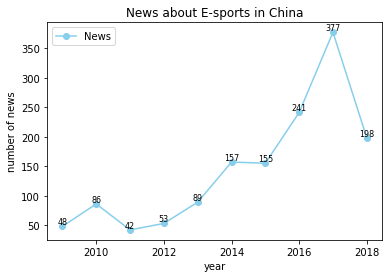

In [52]:
#X轴，Y轴数据
x_1 = x1
y_1 = y1
#plt.figure(figsize=(16,8)) #创建绘图对象
plt.plot(x_1,y_1,'o-',label='News',color = 'skyblue')   #在当前绘图对象绘图（X轴，Y轴）
plt.xlabel("year") #X轴标签
plt.ylabel("number of news")  #Y轴标签
plt.title("News about E-sports in China") #图标题

for a, b in zip(x_1, y_1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8)

plt.legend()
plt.show()  #显示图